In [1]:
from sqlalchemy import create_engine
from sqlalchemy import create_engine
import pandas as pd    
import matplotlib.pyplot as plt
import datetime as dt


## Class to make connection to local database.
It uses 
* ` Username `

* ` Password `
* ` Database `
as inputs.

In [2]:
class db_con:
 def open_local_db(self,**kwargs):
       
    # Postgres username, password, and database name
    POSTGRES_ADDRESS = '127.0.0.1' ## INSERT YOUR DB ADDRESS IF IT'S NOT ON PANOPLY
    POSTGRES_PORT = '5432'
    POSTGRES_USERNAME = kwargs.get('POSTGRES_USERNAME') ## CHANGE THIS TO YOUR PANOPLY/POSTGRES USERNAME
    POSTGRES_PASSWORD =kwargs.get('POSTGRES_PASSWORD')## CHANGE THIS TO YOUR PANOPLY/POSTGRES PASSWORD
    POSTGRES_DBNAME = kwargs.get('POSTGRES_DBNAME') ## CHANGE THIS TO YOUR DATABASE NAME
    # A long string that contains the necessary Postgres login information
    postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME,password=POSTGRES_PASSWORD,ipaddress=POSTGRES_ADDRESS,port=POSTGRES_PORT,dbname=POSTGRES_DBNAME))
    # Create the connection
    cnx = create_engine(postgres_str)
    return cnx

### Dictionary for class parameters.

In [3]:
kwargs = {"POSTGRES_USERNAME" : "postgres", "POSTGRES_PASSWORD" : "root", "POSTGRES_DBNAME" : "moodle"}

### Make Database connection.

In [4]:
db=db_con()
moodle=db.open_local_db(**kwargs)

### Using the logged data of Users 

In [5]:
verbs_count=pd.read_sql_query('''SELECT userid, action,count(action) AS Count FROM mdl_logstore_standard_log GROUP BY action ,userid ORDER BY userid  ;''', moodle)
verbs_count.head(10)

,userid,action,count
0,-10,failed,1
1,-1,graded,2170
2,0,sent,846
3,0,updated,649
4,0,viewed,5305
5,0,failed,457
6,1,loggedin,1
7,1,viewed,2
8,2,loggedinas,6
9,2,downloaded,1


### Also another better implimentation

In [6]:
pd.read_sql_query('''select userid, sum(case when action = 'viewed' then 1 else 0 end) as viewed,sum(case when action = 'uploaded' then 1 else 0 end) as uploaded ,sum(case when action = 'updated' then 1 else 0 end) as updated,sum(case when action = 'answered' then 1 else 0 end) as answered ,sum(case when action = 'abandoned' then 1 else 0 end) as abandoned, sum(case when action = 'submitted' then 1 else 0 end) as Submitted, sum(case when action = 'searched' then 1 else 0 end) as searched, sum(case when action = 'attempted' then 1 else 0 end) as attempted from mdl_logstore_standard_log group by userid;''', moodle).head(10)

,userid,viewed,uploaded,updated,answered,abandoned,submitted,searched,attempted
0,251,72,0,1,0,0,0,0,0
1,264,85,0,1,0,0,0,0,0
2,887,18,0,1,0,0,0,0,0
3,802,16,0,1,0,0,0,0,0
4,496,12,0,0,0,0,0,0,0
5,455,14,0,0,0,0,0,0,0
6,630,14,0,1,0,0,0,0,0
7,209,185,0,9,1,0,4,0,0
8,276,72,0,0,0,0,0,0,0
9,606,12,0,0,0,0,0,0,0


### Plot Sample Users Activity

In [7]:
verbs_count.groupby(['userid']).sum()
verbs_count['userid'] = verbs_count.index

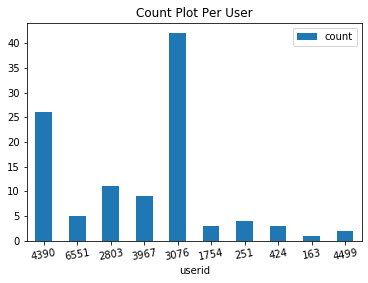

In [8]:
verbs_count.sample(10).plot.bar(x="userid", y="count",stacked=True,rot=10, title="Count Plot Per User");

### Overall grade

In [73]:
grade=pd.read_sql_query('''SELECT userid AS USER_ID, sum(finalgrade) AS Grade FROM mdl_grade_grades GROUP BY userid ORDER BY userid ;''', moodle)
grade.head(3)

,user_id,grade
0,2,NaN
1,3,200.00000
2,5,400.66666


### Forum Posts

In [10]:
pd.read_sql_query('''SELECT COUNT(*) FROM mdl_forum_posts ;''', moodle)

,count
0,131


# ==============================================================
##                     SQL Script 
# ==============================================================

#### The number of tables 

In [11]:
pd.read_sql_query('''select count(*) from information_schema.tables where table_schema = 'public';''', moodle)

,count
0,448


#### The number of records in each of the tables given in the MIT section

In [12]:
pd.read_sql_query('''select count(*) from information_schema.tables where table_schema = 'public';''', moodle)

,count
0,448


#### Number of quiz submissions by hour of day

In [13]:
pd.read_sql_query('''select count(id) AS Number_of_quizes, EXTRACT(HOUR FROM to_timestamp(timecreated)) AS Hour_of_day from mdl_logstore_standard_log where action='submitted' AND component='mod_quiz' group by EXTRACT(HOUR FROM to_timestamp(timecreated));''', moodle).head(5)


,number_of_quizes,hour_of_day
0,46,10.0
1,26,0.0
2,57,20.0
3,46,22.0
4,68,17.0
5,53,23.0
6,95,12.0
7,88,13.0
8,90,15.0
9,14,5.0


#### Count of log events per user for the following verbs

In [14]:
pd.read_sql_query('''select userid, sum(case when action = 'viewed' then 1 else 0 end) as viewed,sum(case when action = 'uploaded' then 1 else 0 end) as uploaded ,sum(case when action = 'updated' then 1 else 0 end) as updated,sum(case when action = 'answered' then 1 else 0 end) as answered ,sum(case when action = 'abandoned' then 1 else 0 end) as abandoned, sum(case when action = 'submitted' then 1 else 0 end) as Submitted, sum(case when action = 'searched' then 1 else 0 end) as searched, sum(case when action = 'attempted' then 1 else 0 end) as attempted from mdl_logstore_standard_log group by userid;''', moodle).head(10)

,userid,viewed,uploaded,updated,answered,abandoned,submitted,searched,attempted
0,251,72,0,1,0,0,0,0,0
1,264,85,0,1,0,0,0,0,0
2,887,18,0,1,0,0,0,0,0
3,802,16,0,1,0,0,0,0,0
4,496,12,0,0,0,0,0,0,0
5,455,14,0,0,0,0,0,0,0
6,630,14,0,1,0,0,0,0,0
7,209,185,0,9,1,0,4,0,0
8,276,72,0,0,0,0,0,0,0
9,606,12,0,0,0,0,0,0,0


# ==============================================================
##                     Data Extraction Transformation and Loading (ETL) 
# ==============================================================

## Dedication Time

#### Fetch user login and various activities.

In [15]:
user=pd.read_sql_query('''select userid,action,timecreated from mdl_logstore_standard_log ;''', moodle)
user.sample(3)

,userid,action,timecreated
4012,73,viewed,1549650124
354562,-1,graded,1559311025
205943,2,awarded,1556109259


#### Capture date and timestamp of action

In [16]:
user['date_time'] = pd.to_datetime(user['timecreated'],unit='s')
user.sample(3)

,userid,action,timecreated,date_time
238144,586,sent,1556557138,2019-04-29 16:58:58
358070,266,viewed,1560424676,2019-06-13 11:17:56
283752,480,viewed,1557769367,2019-05-13 17:42:47


#### Split date and time

In [17]:
user['date'] = user['date_time'].dt.date
user.sample(3)

,userid,action,timecreated,date_time,date
107966,170,sent,1553501669,2019-03-25 08:14:29,2019-03-25
81518,44,viewed,1552573772,2019-03-14 14:29:32,2019-03-14
171798,347,viewed,1554145129,2019-04-01 18:58:49,2019-04-01


In [18]:
user['time'] = user['date_time'].dt.time
user.sample(3)

,userid,action,timecreated,date_time,date,time
282919,759,sent,1557759180,2019-05-13 14:53:00,2019-05-13,14:53:00
13817,3,created,1550438356,2019-02-17 21:19:16,2019-02-17,21:19:16
254385,581,sent,1556814250,2019-05-02 16:24:10,2019-05-02,16:24:10


#### A function to determine which action belongs to which session

In [19]:
k=1
def feature_new3(TOP_PACK):
 global k   
 if((TOP_PACK)>180):
        k=k+1
        return 'Session'+str(k)
 else :
        return 'Session'+str(k)

#### Apply function to the difference between two consecuative time stamps for each user.

In [20]:
result=pd.DataFrame(columns=['userid', 'action', 'timecreated', 'date_time', 'date', 'time', 'dates',
       'differences', 'session'])
for i in user['userid'].unique():
    k=1
    ten=user.loc[user["userid"]==i]
    ten=ten.sort_values('timecreated')
    ten['dates'] = ten['timecreated'].shift(-1)
    ten['differences']=ten['dates']-ten['timecreated']
    ten['differences'] = ten['differences'].shift(1)
    ten['session']=ten['differences'].apply(feature_new3)
    result=pd.concat([result,ten])
    

#### Now group  by user and session to find dedication time of each user.
Also for each user the following Session distribution of each  user.
* Mean
* Max
* Min
* Sum

In [62]:
grouped_multiple = result.groupby(['userid', 'session']).agg({'differences': ['mean', 'min', 'max','sum']})
grouped_multiple.head(3)

differences                           
                        mean      min      max      sum
userid session                                         
-10    Session1          NaN      NaN      NaN      0.0
-1     Session1          NaN      NaN      NaN      0.0
       Session10     24261.0  24261.0  24261.0  24261.0

In [43]:
def time(sec):
    return dt.timedelta(seconds=sec)

#### Finally to calculate Dedication time,Group them by User.

In [44]:
grouped_multiple2=grouped_multiple.groupby(['userid']).agg({('differences','sum'): ['mean', 'min', 'max','sum']})
grouped_multiple2['dedication']=grouped_multiple2[('differences','sum')]['sum'].apply(time)
grouped_multiple2.columns = grouped_multiple2.columns.get_level_values(0)
grouped_multiple2['dedication'].sample(10)

userid
702     89 days 00:46:52
256    152 days 06:00:04
485     89 days 00:47:57
335    130 days 13:35:50
1040    11 days 17:32:24
Name: dedication, dtype: timedelta64[ns]

### Dedication 
<img src="https://github.com/natananshiferaw/Educational-Data-Log-Analysis/blob/master/dedication.PNG?raw=true">

## Login and Activity

### Count the Login of each User

In [45]:
log=result.loc[result["action"]=='loggedin'].groupby(['userid']).agg({'action': ['count']})
log = log.rename({'count': 'log_count'}, axis=1)
log.head(5)

,action
,log_count
userid,
1,1
2,169
3,107
5,54
7,3


### Count the other Activities of each User

In [46]:
activity=result.loc[result["action"]!='loggedin'].groupby(['userid']).agg({'action': ['count']})
activity = activity.rename({'count': 'activity_count'}, axis=1)
activity.head(5)

,action
,activity_count
userid,
-10,1
-1,2170
0,7257
1,2
2,44854


### Function to cluster the top 1%,5%,10% and 25% Users by 
###  Activity and   Login.


In [169]:
def top(p,df,al):
    p1=(df.sort_values(p, ascending=False)
       .apply(lambda x: x.head(int(len(x) * 0.01)))
        )
    p1[p[1]+'top1']='top1'
    p1.columns = p1.columns.get_level_values(0)
    p1.rename(columns = {'action':'action_'+p[1]}, inplace = True) 
    p5=(df.sort_values(p, ascending=False)
       .apply(lambda x: x.head(int(len(x) * 0.05)))
        )
    p5[p[1]+'top5']='top5'
    p5.columns = p5.columns.get_level_values(0)
    p5.rename(columns = {'action':'action_'+p[1]}, inplace = True) 
    p10=(df.sort_values(p, ascending=False)
       .apply(lambda x: x.head(int(len(x) * 0.10)))
        )
    p10[p[1]+'top10']='top10'
    p10.columns = p10.columns.get_level_values(0)
    p10.rename(columns = {'action':'action_'+p[1]}, inplace = True) 
    p25=(df.sort_values(p, ascending=False)
       .apply(lambda x: x.head(int(len(x) * 0.25)))
        )
    p25[p[1]+'top25']='top25'
    p25.columns = p25.columns.get_level_values(0)
    p25.rename(columns = {'action':'action_'+p[1]}, inplace = True) 
    print(p1)
    print(p5)
    print(p10)
    print(p25)
        
    return [p1,p5,p10,p25]

In [126]:
top_activity=top(('action','activity_count'),activity)   

        action_activity_count activity_count
userid                                      
2                       44854           top1
246                     13804           top1
3                       12815           top1
917                     10649           top1
581                     10482           top1
290                      8485           top1
347                      7294           top1
0                        7257           top1
607                      6424           top1
344                      5951           top1
        action_activity_count activity_count
userid                                      
 2                      44854           top5
 246                    13804           top5
 3                      12815           top5
 917                    10649           top5
 581                    10482           top5
 290                     8485           top5
 347                     7294           top5
 0                       7257           top5
 607      

In [127]:
top_log=top(('action','log_count'),log)   

        action_log_count log_count
userid                            
2                    169      top1
246                  113      top1
3                    107      top1
369                  100      top1
165                   91      top1
290                   73      top1
        action_log_count log_count
userid                            
2                    169      top5
246                  113      top5
3                    107      top5
369                  100      top5
165                   91      top5
290                   73      top5
344                   68      top5
266                   64      top5
45                    63      top5
90                    57      top5
170                   55      top5
5                     54      top5
581                   51      top5
190                   50      top5
917                   47      top5
25                    46      top5
277                   46      top5
383                   42      top5
57                  

In [128]:
top_activity[2].sample(5)

,action_activity_count,activity_counttop10
userid,,
382,2971,top10
586,3821,top10
686,2051,top10
286,1182,top10
879,3721,top10


### Activity Count can be seen in the middle

<img src="https://github.com/natananshiferaw/Educational-Data-Log-Analysis/blob/master/activity.PNG?raw=true">

## Merge Findings

In [129]:
def top_merge(tab,top_log):
    for i in range(4):
        
        tab=tab.merge(top_log[i],  left_on='id', right_on=top_log[i].index, how='outer')
    return  tab   
        

In [159]:
tableau=pd.read_sql_query('''select * from mdl_user ;''', moodle)
tableau=tableau.merge(grouped_multiple2,  left_on='id', right_on=grouped_multiple2.index, how='outer')
tableau=tableau.merge(grade,  left_on='id', right_on='user_id', how='outer')

tableau=top_merge(tableau,top_log)
df=tableau
cols=pd.Series(df.columns)
for dup in df.columns[df.columns.duplicated(keep=False)]: 
    cols[df.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(df.columns.get_loc(dup).sum())]
                                    )
tableau.columns=cols
tableau
tableau=top_merge(tableau,top_activity)
df=tableau
cols=pd.Series(df.columns)
for dup in df.columns[df.columns.duplicated(keep=False)]: 
    cols[df.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(df.columns.get_loc(dup).sum())]
                                    )
tableau.columns=cols
tableau.iloc[:, 31]=tableau.iloc[:, 31].fillna(tableau.iloc[:, 33])
tableau.iloc[:, 31]=tableau.iloc[:, 31].fillna(tableau.iloc[:, 35])
tableau.iloc[:, 31]=tableau.iloc[:, 31].fillna(tableau.iloc[:, 37])
tableau.iloc[:, 31]=tableau.iloc[:, 31].fillna(tableau.iloc[:, 35])
#tableau.iloc[:, 31]=tableau.iloc[:, 31].fillna('other')
tableau.iloc[:, 30]=tableau.iloc[:, 30].fillna(tableau.iloc[:, 32])
tableau.iloc[:, 30]=tableau.iloc[:, 30].fillna(tableau.iloc[:, 34])
tableau.iloc[:, 30]=tableau.iloc[:, 30].fillna(tableau.iloc[:, 36])


tableau.iloc[:, 23]=tableau.iloc[:, 23].fillna(tableau.iloc[:, 25])
tableau.iloc[:, 23]=tableau.iloc[:, 23].fillna(tableau.iloc[:, 27])
tableau.iloc[:, 23]=tableau.iloc[:, 23].fillna(tableau.iloc[:, 29])
#tableau.iloc[:, 23]=tableau.iloc[:, 23].fillna('other')
tableau.iloc[:, 22]=tableau.iloc[:, 22].fillna(tableau.iloc[:, 24])
tableau.iloc[:, 22]=tableau.iloc[:, 22].fillna(tableau.iloc[:, 26])
tableau.iloc[:, 22]=tableau.iloc[:, 22].fillna(tableau.iloc[:, 28])


### Discard Columns not important

In [160]:
tableau = tableau.iloc[:, :-6]
lasttwo= tableau.iloc[:,-2:]
tableau = tableau.iloc[:, :-8]
tableau['action_activity_count_x']=lasttwo['action_activity_count_x']
tableau['activity_count_x']=lasttwo['activity_count_x']
tableau.columns = tableau.columns.get_level_values(0)

In [161]:
tableau['action_log_count_x'] = tableau['action_log_count_x'].astype(float)
tableau['action_activity_count_x'] = tableau['action_activity_count_x'].astype(float)

In [163]:
tableau.columns

Index(['id', 'confirmed', 'policyagreed', 'deleted', 'suspended', 'idnumber',
       'country', 'lang', 'firstaccess', 'lastaccess', 'lastlogin',
       'currentlogin', 'lastip', 'gender', 'CountryCode', 'differences.3',
       'differences', 'differences.1', 'differences.2', 'dedication',
       'user_id', 'grade', 'action_log_count_x', 'log_count_x',
       'action_activity_count_x', 'activity_count_x'],
      dtype='object')

## Insert back to Moodle Database 

In [162]:
from sqlalchemy import create_engine
#pd.read_sql_query('''DROP TABLE IF EXISTS tableau;''', moodle)
tableau.to_sql('tableau', moodle)

c:\users\chuna\anaconda3\lib\site-packages\pandas\core\generic.py:2531: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  dtype=dtype, method=method)


# Final Results

<img src="https://github.com/natananshiferaw/Educational-Data-Log-Analysis/blob/master/image.PNG?raw=true">